Aproximación de la raíz: (1+0j)
Número de iteraciones realizadas: 1


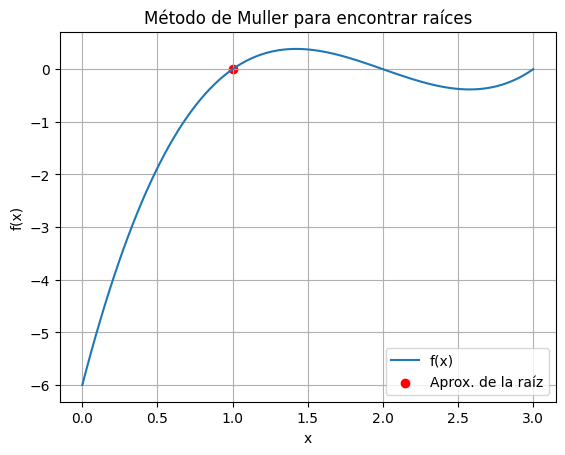

In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

def muller_method(func, x0, x1, x2, tol=1e-6, max_iter=100):
    """
    Método de Muller para encontrar raíces de una función.

    :param func: La función para la cual encontrar la raíz.
    :param x0: Primera aproximación inicial.
    :param x1: Segunda aproximación inicial.
    :param x2: Tercera aproximación inicial.
    :param tol: Tolerancia para la convergencia.
    :param max_iter: Número máximo de iteraciones.
    :return: Aproximación de la raíz, número de iteraciones realizadas.
    """
    iter_count = 0

    while iter_count < max_iter:
        h1 = x1 - x0
        h2 = x2 - x1
        delta1 = (func(x1) - func(x0)) / h1
        delta2 = (func(x2) - func(x1)) / h2
        a = (delta2 - delta1) / (h2 + h1)
        b = a * h2 + delta2
        c = func(x2)

        discriminant = cmath.sqrt(b**2 - 4*a*c)
        denominator = b + discriminant if abs(b - discriminant) > abs(b + discriminant) else b - discriminant

        if denominator == 0:
            break

        x3 = x2 - 2 * c / denominator
        f_x3 = func(x3)

        if abs(f_x3) < tol:
            return x3, iter_count + 1

        x0, x1, x2 = x1, x2, x3
        iter_count += 1

    return None, iter_count

# Ejemplo de uso:
if __name__ == "__main__":
    # Definir la función y las aproximaciones iniciales
    def f(x):
        return x**3 - 6*x**2 + 11*x - 6

    initial_approximation_0 = 0.5
    initial_approximation_1 = 1.0
    initial_approximation_2 = 1.5

    # Aplicar el método de Muller
    root, iterations = muller_method(f, initial_approximation_0, initial_approximation_1, initial_approximation_2)

    # Mostrar resultados
    if root is not None:
        print(f"Aproximación de la raíz: {root}")
        print(f"Número de iteraciones realizadas: {iterations}")

        # Crear gráfico de la función y la raíz encontrada
        x_values = np.linspace(0, 3, 100)
        func_values = f(x_values)

        plt.plot(x_values, func_values, label="f(x)")
        plt.scatter(root.real, f(root.real), color='red', label='Aprox. de la raíz')
        plt.title("Método de Muller para encontrar raíces")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("El método de Muller no convergió.")
